## Task 1 by Chander Bijlani

# Imported libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Desktop\student_scores.csv', delimiter = ',')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Visualization

In [3]:
x = df.Hours
y = df.Scores

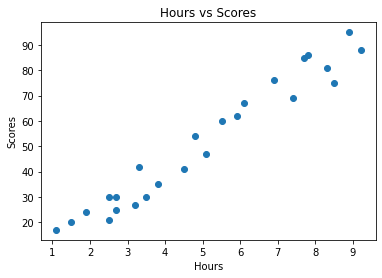

In [4]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.scatter(x,y)

### Model

In [5]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [6]:

train = df.drop(['Scores'], axis = 1)
test = df['Scores']
X_train, X_test,y_train,y_test = train_test_split(train,test,random_state = 42)

In [7]:
regr = LinearRegression()

In [8]:
regr.fit(X_train,y_train)

LinearRegression()

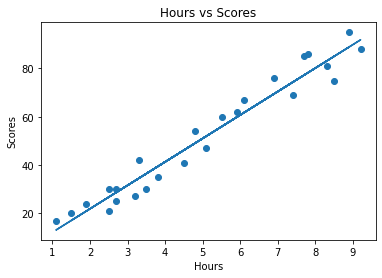

In [9]:
slope = regr.coef_*x + regr.intercept_
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.scatter(x,y)
plt.plot(x,slope)
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error as m

In [11]:
train_prediction = regr.predict(X_train)

In [12]:
k = m(train_prediction,y_train)

In [13]:
print("Mean absolute error in train set: ",k)

Mean absolute error in train set:  5.213322648757283


In [14]:
test_prediction = regr.predict(X_test)

In [15]:
k = m(test_prediction,y_test)

In [16]:
print("Mean absolute error in test set: ",k)

Mean absolute error in test set:  4.425394675156183


# Model Testing

In [17]:
test_predict = regr.predict(X_test)

In [18]:
test_predict

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
own_pred = regr.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 92.33571987331146


In [20]:
# Comparison between the actual values vs predicted values.
difference = pd.DataFrame({'Actual Values': y_test,'Predicted Values': test_predict})
difference['Diff'] = difference['Actual Values'] - difference['Predicted Values']
difference.head()

,Actual Values,Predicted Values,Diff
8,81,83.107332,-2.107332
16,30,26.765598,3.234402
0,21,26.765598,-5.765598
23,76,69.507603,6.492397
11,62,59.793511,2.206489


In [21]:
regr.score(X_test,y_test) 

0.9553509219739938

# So we got accuracy of 95% for our model 